# Make diagrams for lookup table

In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb

In [2]:
data_str = '70bar6C'
data = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt2.pkl', 'rb'))
data2 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt3.pkl', 'rb'))
data += data2
data3 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt4.pkl', 'rb'))
data += data3
data4 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt5.pkl', 'rb'))
data += data4
data5 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt6.pkl', 'rb'))
data += data5
data6 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt7.pkl', 'rb'))
data += data6
data7 = pickle.load(open('c1toc3_flashtable_' + data_str + '_pt8.pkl', 'rb'))
data += data7
all3_data = [x for x in data if x[4] != []]
broken = [x for x in data7 if (x[4] != []) and ((x[-1][-1] > 1e-6) or (x[-1][-1] == 100))]

In [3]:
if broken != []:
    print(len(broken))
    print(broken)

In [4]:
data7

[[0,
  array([ 0.6       ,  0.24864865,  0.0972973 ,  0.05405405]),
  ('water', 'methane', 'ethane', 'propane'),
  array([ 0.6       ,  0.24864865,  0.0972973 ,  0.05405405]),
  [array([[  9.97708687e-01,   1.45259115e-04,   1.45259048e-04,
             8.57150093e-01,   8.59764327e-01],
          [  1.63532883e-03,   6.12939883e-01,   6.12939531e-01,
             6.68390328e-02,   9.08942206e-02],
          [  5.31744986e-04,   2.89400931e-01,   2.89401123e-01,
             7.59573259e-02,   1.41076186e-02],
          [  1.24238772e-04,   9.75139264e-02,   9.75140868e-02,
             5.35481144e-05,   3.52338338e-02]]),
   array([  0.00000000e+00,   1.00000000e-10,   3.02185363e-01,
            0.00000000e+00,   6.97814637e-01]),
   array([[  5.67342970e+03,   1.00000026e+00,   1.00000000e+00,
             5.55992692e+03,   5.91883602e+03],
          [  2.20380220e-03,   1.00000032e+00,   1.00000000e+00,
             1.09046699e-01,   1.48292313e-01],
          [  1.51770754e-03,   9

In [5]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum(np.abs(x[4][0][:, 1] - x[4][0][:, 2])) < 1e-6:
        if (x[4][1][1] > x[4][1][2]) and (x[4][1][1] > 1e-10):
            index_get.append(1)
        elif (x[4][1][2] > 1e-10):
            index_get.append(2)
    else:
        if x[4][1][1] > 1e-10:
            index_get.append(1)
        if x[4][1][2] > 1e-10:
            index_get.append(2)
    for ii in [0, 3, 4]:
        if x[4][1][ii] > 1e-10:
            index_get.append(ii)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'gray'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        else:
            color = 'burgundy'
    return index_get, color

In [6]:
phase_stable_lookup = dict()
type_ref_list = list()
phase_type = 0
for ii, x in enumerate(all3_data):
    index_get, color = get_stable_phases(x)
    if sorted(index_get) in type_ref_list:
        phase_stable_lookup[type_ref_list.index(sorted(index_get))]['inds'].append(ii)
    else:
        phase_stable_lookup[phase_type] = {'phases': sorted(index_get), 'inds': [ii], 'color': color}
        phase_type += 1
        type_ref_list.append(sorted(index_get))

In [7]:
def plot_tern_lines(x, tern_inds=[0,1,2]):
    z = x[4][0]
    if np.sum(x[1][tern_inds]) == 1:
        index_get, color = get_stable_phases(x)
        if x[-1][-1] < 1e-5:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
    
    

In [8]:
def sr2xy(c1, c2):
    x = c1 + 0.5 * c2
    y = c2 * (np.sqrt(3.0) / 2.0)
    return x, y

In [9]:
def ctoxyz(c1, c2, c3):
    x = 0.5 * (c1 + c3) + c2
    y = c1 * (np.sqrt(3.0) / 2.0) + c3 * (1 / (2.0 * np.sqrt(3.0)))
    z = c3 * np.sqrt(2.0 / 3.0)
    return x, y, z

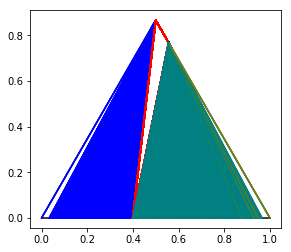

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
c1c2_inds = [0, 1, 2]
c1c3_inds = [0, 1, 3]
c2c3_inds = [0, 2, 3]
tern_inds = c2c3_inds
for x in all3_data:
    plot_tern_lines(x, tern_inds=tern_inds)
# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
# plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
# plt.text(1.0, 0, 'C' + str(tern_inds[1]))



# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])
plt.savefig('test.svg')
plt.show()

In [11]:
color_dict = {0: 'blue',
              1: 'red',
              2: 'purple',
              3: 'black',
              4: 'orange'}

In [12]:
def plot_3d_tietri(index_interest, color, tie=False):
    x_line = dict([('1', []), ('2', []), ('3', [])])
    y_line = dict([('1', []), ('2', []), ('3', [])])
    z_line = dict([('1', []), ('2', []), ('3', [])])
    triangles = list()
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[-1][-1] < 1e-6):
                z = x[4][0]
                if (len(z) == 4) or (x[1][3] == 0):
                    x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][2] == 0.0:
                    x1, y1, z1 = ctoxyz(0, z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(0, z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(0, z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][1] == 0.0:
                    x1, y1, z1 = ctoxyz(z[1, index_interest[0]], 0, z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[1, index_interest[1]], 0, z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[1, index_interest[2]], 0, z[0, index_interest[2]])
                triangles.append([[x1, x2, x3, x1], [y1, y2, y3, y1], [z1, z2, z3, z1]])
                z_line['1'].append(z1)
                z_line['2'].append(z2)
                z_line['3'].append(z3)

                y_line['1'].append(y1)
                y_line['2'].append(y2)
                y_line['3'].append(y3)

                x_line['1'].append(x1)
                x_line['2'].append(x2)
                x_line['3'].append(x3)

        if (x_line['1'] != []):
            if tie:
                for tietri in triangles:
                    ax.plot(tietri[0], tietri[1], tietri[2], '-', color=color)
            ax.plot(x_line['1'], y_line['1'], z_line['1'], '.', color=color_dict[index_interest[0]])
            ax.plot(x_line['2'], y_line['2'], z_line['2'], '.', color=color_dict[index_interest[1]])
            ax.plot(x_line['3'], y_line['3'], z_line['3'], '.', color=color_dict[index_interest[2]])
        

In [13]:
def plot_3d_4phase(index_interest):
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 100) and (x[-1][-1] < 1e-6):
                z = x[4][0]
                x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                x4, y4, z4 = ctoxyz(z[2, index_interest[3]], z[1, index_interest[3]], z[0, index_interest[3]])
                ax.plot([x1, x2], [y1, y2], [z1, z2], '-', color='pink')
                ax.plot([x2, x3], [y2, y3], [z2, z3], '-', color='pink')
                ax.plot([x3, x1], [y3, y1], [z3, z1], '-', color='pink')
                ax.plot([x4, x1], [y4, y1], [z4, z1], '-', color='pink')
                ax.plot([x4, x2], [y4, y2], [z4, z2], '-', color='pink')
                ax.plot([x4, x3], [y4, y3], [z4, z3], '-', color='pink')

In [14]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
# import itertools as itool
# %matplotlib notebook
# fig = plt.figure(figsize=(8,6))
# ax = fig.gca(projection='3d')
# vertices = [[1, 0, 0, 0],
#             [0, 1, 0, 0],
#             [0, 0, 1, 0],
#             [0, 0, 0, 1]]
# pts = [ctoxyz(x[0], x[1], x[2]) for x in vertices]
# pt_pairs = itool.combinations(range(4), 2)
# for pair in pt_pairs:
#     ax.plot([pts[pair[0]][0], pts[pair[1]][0]],
#             [pts[pair[0]][1], pts[pair[1]][1]],
#             [pts[pair[0]][2], pts[pair[1]][2]], 'k-')
# ax.text(pts[0][0], pts[0][1], pts[0][2], 'C2')
# ax.text(pts[1][0], pts[1][1], pts[1][2], 'C1')
# ax.text(pts[3][0], pts[3][1], pts[3][2], 'C3')


# plot_3d_tietri([0, 1, 3], 'orange', tie=False)
# plot_3d_tietri([0, 1, 4], 'red', tie=False)
# plot_3d_tietri([1, 3, 4], 'blue', tie=False)
# plot_3d_tietri([2, 3, 4], 'brown', tie=False)
# plot_3d_tietri([0, 1, 2], 'green', tie=False)
# plot_3d_tietri([1, 2, 4], 'teal', tie=False)
# plot_3d_tietri([1, 2, 3], 'olive', tie=False)
# plot_3d_tietri([0, 3, 4], 'black', tie=False)
# plot_3d_tietri([0, 2, 4], 'gray', tie=False)
# plot_3d_tietri([0, 2, 3], 'purple', tie=False)


# plot_3d_4phase([1, 2, 3, 4])
# plot_3d_4phase([0, 2, 3, 4])
# plot_3d_4phase([0, 1, 3, 4])






# ax.view_init(30, 180)
# # plt.show()

In [15]:
def plot_pseudo_4phase(index_mod):
    if sorted(index_mod) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_mod))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 100) and (x[-1][-1] < 1e-6):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                x3, y3 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                x4, y4 = sr2xy(z_p[0, index_mod[3]], z_p[2, index_mod[3]])
                plt.plot([x1, x2], [y1, y2], '--', color='pink')
                plt.plot([x2, x3], [y2, y3], '--', color='pink')
                plt.plot([x3, x1], [y3, y1], '--', color='pink')
                plt.plot([x4, x1], [y4, y1], '--', color='pink')
                plt.plot([x4, x2], [y4, y2], '--', color='pink')
                plt.plot([x4, x3], [y4, y3], '--', color='pink')

In [16]:
def plot_pseudo_tern(index_interest):
    if sorted(index_interest) in type_ref_list:
        x_line = dict([('1', []), ('2', []), ('3', [])])
        y_line = dict([('1', []), ('2', []), ('3', [])])
    #     triangles = list()
        index_mod = [ind for ind in index_interest if ind !=0]
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[4][3] != 100) and (x[-1][-1] < 1e-6):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                if (len(z_p) == 3):
                        x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                        x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                else:
                    if x[1][2] == 0.0:
                            x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[1, index_mod[0]])
                            x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[1, index_mod[1]])
                    elif x[1][1] == 0.0:
                            x1, y1 = sr2xy(0, z_p[1, index_mod[0]])
                            x2, y2 = sr2xy(0, z_p[1, index_mod[1]])
                    elif x[1][3] == 0.0:
                            x1, y1 = sr2xy(z_p[0, index_mod[0]], 0)
                            x2, y2 = sr2xy(z_p[0, index_mod[1]], 0) 
                y_line['1'].append(y1)
                y_line['2'].append(y2)
                x_line['1'].append(x1)
                x_line['2'].append(x2)
        if (x_line['1'] != []):
            plt.plot(x_line['1'], y_line['1'], '.', color=color_dict[index_mod[0]])
            plt.plot(x_line['2'], y_line['2'], '.', color=color_dict[index_mod[1]])        

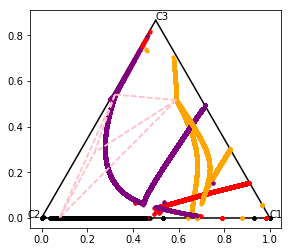

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')

# Excess Water Terns
plot_pseudo_tern([0, 1, 3])
plot_pseudo_tern([0, 2, 3])
plot_pseudo_tern([0, 1, 4])
plot_pseudo_tern([0, 2, 4])
plot_pseudo_tern([3, 4, 0])
plot_pseudo_tern([0, 1, 2])


# Excess Gas Terns
plot_pseudo_tern([1, 2, 3])
plot_pseudo_tern([1, 3, 2])
plot_pseudo_tern([1, 2, 4])
plot_pseudo_tern([4, 2, 1])


# plot_pseudo_tern([1, 4, 2])
plot_pseudo_tern([1, 3, 4])
plot_pseudo_tern([2, 3, 4])
plot_pseudo_tern([1, 4, 3])
plot_pseudo_tern([2, 4, 3])
plot_pseudo_tern([0, 1, 2])

# Possible 4-phase
plot_pseudo_4phase([1, 2, 3, 4])
plot_pseudo_4phase([0, 2, 3, 4])
plot_pseudo_4phase([0, 1, 3, 4])
plot_pseudo_4phase([0, 1, 2, 3])
plot_pseudo_4phase([0, 1, 2, 4])










plt.axis('scaled')
plt.text(-0.06, 0, 'C2')
plt.text(1.0, 0, 'C1')
plt.text(0.5, 0.87, 'C3')

# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])


plt.savefig('test2.svg')
plt.show()

In [18]:
type_ref_list

[[1, 4],
 [1, 2, 4],
 [2, 4],
 [0, 1],
 [1, 3],
 [1, 3, 4],
 [2, 3, 4],
 [2, 3],
 [1, 2, 3],
 [0, 1, 3],
 [1, 2, 3, 4],
 [0, 2, 4],
 [0, 2, 3, 4],
 [0, 2, 3],
 [0, 3, 4],
 [0, 3],
 [0, 4],
 [0, 1, 4],
 [3],
 [0, 1, 3, 4],
 [0, 2],
 [3, 4],
 [0]]

In [19]:
error_comps = [x for x in all3_data if x[-1][-1] > 1e-6]

In [20]:
len(error_comps)

848

In [21]:
error_comps

[[658,
  array([ 0.1       ,  0.33230769,  0.23538462,  0.33230769]),
  ('water', 'methane', 'ethane', 'propane'),
  array([ 0.1       ,  0.33230769,  0.23538462,  0.33230769]),
  [array([[  9.97739271e-01,   1.44033631e-04,   1.03694366e-04,
             8.57474272e-01,   8.59556766e-01],
          [  1.70186616e-03,   6.13978598e-01,   3.64059332e-01,
             7.71754574e-02,   9.08856234e-02],
          [  3.66477748e-04,   2.12210499e-01,   2.65354631e-01,
             6.52480578e-02,   7.50904074e-03],
          [  1.92385362e-04,   1.73666870e-01,   3.70482343e-01,
             1.02212963e-04,   4.20485703e-02]]),
   array([ 0.        ,  0.        ,  0.88376759,  0.        ,  0.11623241]),
   array([[  7.81595247e+03,   1.35063190e+00,   1.00000000e+00,
             7.43412210e+03,   8.28932950e+03],
          [  3.79728538e-03,   1.63984170e+00,   1.00000000e+00,
             2.11985934e-01,   2.49645086e-01],
          [  1.12186589e-03,   7.77688413e-01,   1.00000000e+00,


In [22]:
all3_data

[[0,
  array([ 0.1  ,  0.756,  0.   ,  0.144]),
  ('water', 'methane', 'propane'),
  array([ 0.1  ,  0.756,  0.144]),
  [array([[  9.97524990e-01,   1.51297967e-04,   1.51297959e-04,
             8.58952991e-01,   8.57722864e-01],
          [  2.20382921e-03,   8.43368489e-01,   8.43368411e-01,
             1.40997287e-01,   9.29858580e-02],
          [  2.71180713e-04,   1.56480213e-01,   1.56480291e-01,
             4.97224445e-05,   4.92912777e-02]]),
   array([  0.00000000e+00,   8.83568082e-01,   1.00000000e-10,
            0.00000000e+00,   1.16431918e-01]),
   array([[  5.18461989e+03,   1.00000000e+00,   9.99999983e-01,
             4.58742873e+03,   5.66909709e+03],
          [  2.05488156e-03,   1.00000000e+00,   9.99999971e-01,
             1.67183489e-01,   1.10255314e-01],
          [  1.36277952e-03,   1.00000000e+00,   1.00000016e+00,
             3.17755475e-04,   3.15000067e-01]]),
   16,
   3.3944116013902341e-07]],
 [0,
  array([ 0.1  ,  0.675,  0.   ,  0.225]),
  ('